In [2]:
%%capture
from bokeh.io import output_notebook
output_notebook(verbose=False)
import holoviews as hv
from holoviews import dim, opts
hv.extension('matplotlib')

In [5]:
import numpy as np
from tallem.datasets import *

## Sample images
samples, params, blob, c = white_dot(n_pixels=17, r=0.35, n=(1200, 100), method="grid")
print(samples.shape)

(1256, 289)


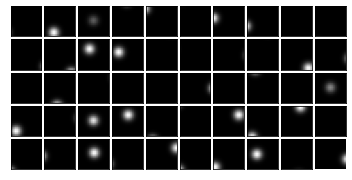

In [12]:
%matplotlib inline
ind = np.random.choice(range(samples.shape[0]), size=5*10, replace=False)
fig, ax = plot_images(samples[ind,:], shape=(17,17), max_val=c, layout=(5,10), figsize=(6,3))

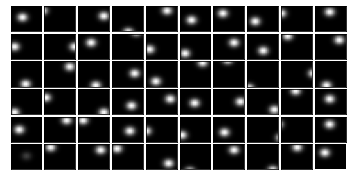

In [14]:
from tallem.samplers import landmarks
Lind, Lrad = landmarks(samples, k = 400)
ind = np.random.choice(Lind, size=6*10, replace=False)
fig, ax = plot_images(samples[ind,:], shape=(17,17), max_val=c, layout=(6,10), figsize=(6,3))

In [15]:
from tallem.cover import LandmarkCover
X = np.vstack((samples[Lind,:], samples[-100:,:]))
cover = LandmarkCover(X, k=20, scale=1.3)
print(cover)

In [40]:
from tallem import TALLEM
top = TALLEM(cover, "pca3", n_components=3).fit(X=X)

In [41]:
top.plot_nerve(plot_width=500, plot_height=250)

:Scatter3D   [x,y,z]
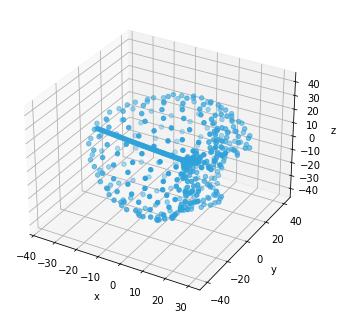

In [42]:
hv.Scatter3D(top.embedding_, )

In [43]:
import datashader as ds